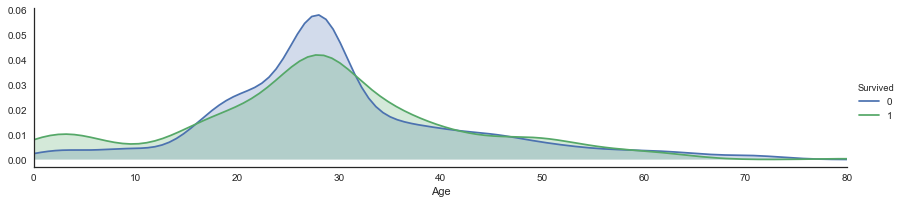

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 7 columns):
Pclass      691 non-null int64
Sex         691 non-null int64
Age         691 non-null int64
SibSp       691 non-null int64
Parch       691 non-null int64
Fare        691 non-null int64
Embarked    691 non-null int64
dtypes: int64(7)
memory usage: 37.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 691 to 890
Data columns (total 7 columns):
Pclass      200 non-null int64
Sex         200 non-null int64
Age         200 non-null int64
SibSp       200 non-null int64
Parch       200 non-null int64
Fare        200 non-null int64
Embarked    200 non-null int64
dtypes: int64(7)
memory usage: 11.0 KB
None


In [1]:
"""Kaggle_Titanic, 2/22/17, Sajad Azami"""

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')
__author__ = 'sajjadaazami@gmail.com (Sajad Azami)'

# Loading dataset
train_data_set = pd.read_csv('./data_titanic/train.csv', index_col=False)
test_data_set = pd.read_csv('./data_titanic/test.csv', index_col=False)

# Filling missing values
train_data_set['Age'] = train_data_set['Age'].fillna(train_data_set['Age'].median())
test_data_set['Age'] = test_data_set['Age'].fillna(test_data_set['Age'].median())
train_data_set["Fare"] = train_data_set["Fare"].fillna(train_data_set["Fare"].median())
test_data_set["Fare"] = test_data_set["Fare"].fillna(test_data_set["Fare"].median())
train_data_set["Embarked"] = train_data_set["Embarked"].fillna("S")
test_data_set["Embarked"] = test_data_set["Embarked"].fillna("S")

# Categorical to numerical
# Convert the Embarked classes to integer form
train_data_set.loc[train_data_set["Embarked"] == "S", "Embarked"] = 0
train_data_set.loc[train_data_set["Embarked"] == "C", "Embarked"] = 1
train_data_set.loc[train_data_set["Embarked"] == "Q", "Embarked"] = 2
test_data_set.loc[test_data_set["Embarked"] == "S", "Embarked"] = 0
test_data_set.loc[test_data_set["Embarked"] == "C", "Embarked"] = 1
test_data_set.loc[test_data_set["Embarked"] == "Q", "Embarked"] = 2
# Convert the male and female groups to integer form
train_data_set.loc[train_data_set["Sex"] == "male", "Sex"] = 0
train_data_set.loc[train_data_set["Sex"] == "female", "Sex"] = 1
test_data_set.loc[test_data_set["Sex"] == "male", "Sex"] = 0
test_data_set.loc[test_data_set["Sex"] == "female", "Sex"] = 1

# convert from float to int
train_data_set['Fare'] = train_data_set['Fare'].astype(int)
test_data_set['Fare'] = test_data_set['Fare'].astype(int)
train_data_set['Age'] = train_data_set['Age'].astype(int)
test_data_set['Age'] = test_data_set['Age'].astype(int)
train_data_set['Embarked'] = train_data_set['Embarked'].astype(int)
test_data_set['Embarked'] = test_data_set['Embarked'].astype(int)
train_data_set['Sex'] = train_data_set['Sex'].astype(int)
test_data_set['Sex'] = test_data_set['Sex'].astype(int)


# Drop unnecessary columns, these columns won't be useful in analysis and prediction
train_data_set = train_data_set.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data_set_ids = test_data_set['PassengerId']
test_data_set = test_data_set.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train_data_set, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_data_set['Age'].max()))
facet.add_legend()
plt.show()

# Split train and test
train_Y = train_data_set['Survived'].ix[0:690]
train_X = train_data_set.drop('Survived', axis=1).ix[0:690]

test_Y = train_data_set['Survived'].ix[691:]
test_X = train_data_set.drop('Survived', axis=1).ix[691:]

print(train_X.info())
print(test_X.info())

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(train_X, train_Y)
print('LogReg ', mean_squared_error(test_Y, log_reg.predict(test_X)))

# Random Forest model
forest = RandomForestClassifier(n_estimators=240,
                                max_depth=7,
                                max_features='sqrt')

forest.fit(train_X, train_Y)
print('RF ', mean_squared_error(test_Y, forest.predict(test_X)))

from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(5, 2), random_state=1)

mlp_clf.fit(train_X, train_Y)
print('MLP ', mean_squared_error(test_Y, mlp_clf.predict(test_X)))

LogReg  0.175


RF  0.155
MLP  0.205


In [11]:
from sklearn.ensemble import VotingClassifier

eclf3 = VotingClassifier(estimators=[
    ('nn', mlp_clf), ('lr', log_reg), ('rf', forest)],
    voting='soft', weights=[1, 1, 2])
eclf3 = eclf3.fit(train_X, train_Y)
predictions = eclf3.predict(test_X)
print('Ensemble ', mean_squared_error(test_Y, predictions))

Ensemble  0.145
